# 1 决策树

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

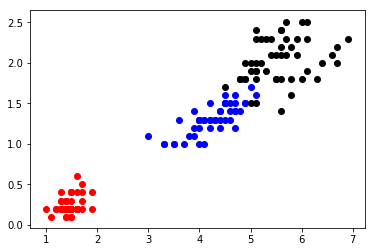

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x = x[:,2:]
plt.scatter(x[y==0,0],x[y==0,1],color = 'r')
plt.scatter(x[y==1,0],x[y==1,1],color = 'b')
plt.scatter(x[y==2,0],x[y==2,1],color = 'k')
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 2,criterion='entropy')
dt_clf.fit(x,y)

In [3]:
def plot_decison_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    cusom_cmp = ListedColormap(['r','g','b'])
    plt.contourf(x0,x1,zz,linewidth = 5,cmap = cusom_cmp)

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


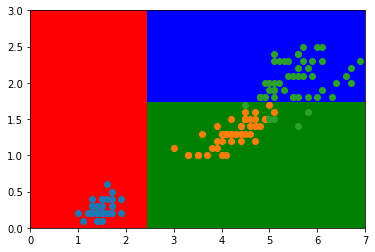

In [4]:
plot_decison_boundary(dt_clf,axis =[0,7,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])

### 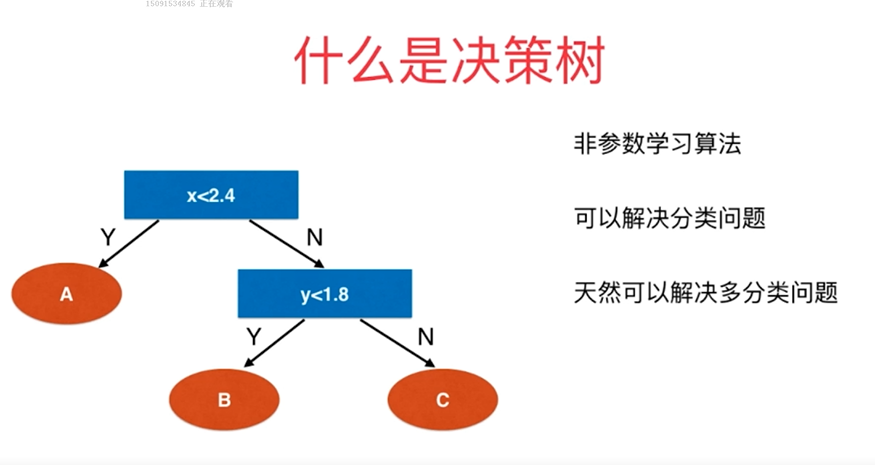

# 2. 信息熵

### 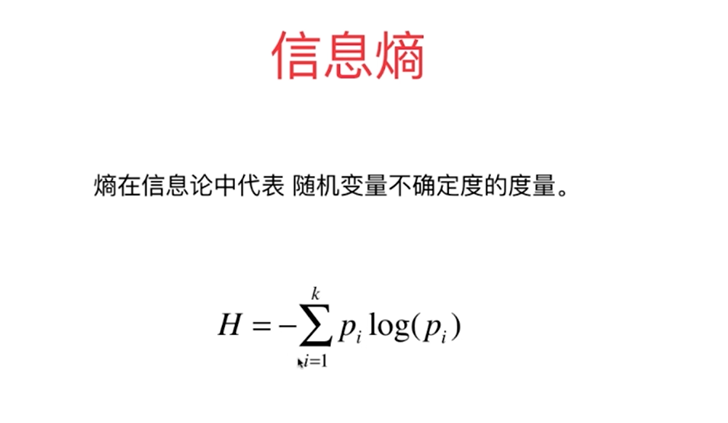

### 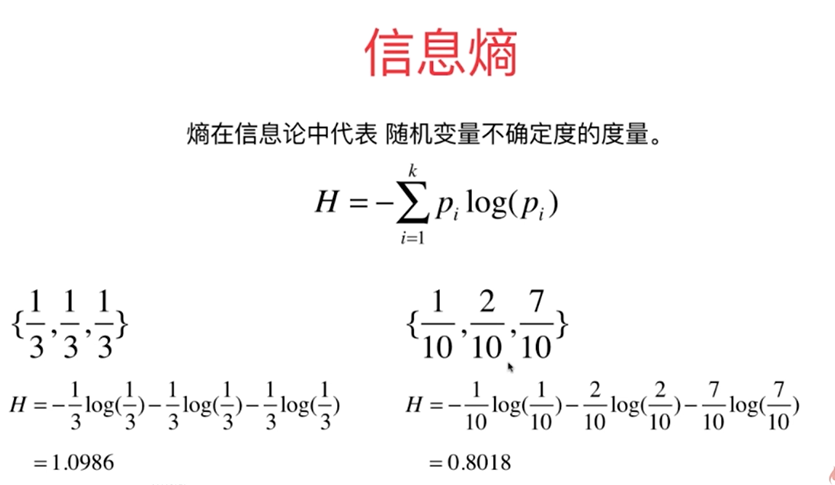

In [5]:
def entry(p):
    return -p*np.log(p)-(1-p)*np.log(1-p)


In [6]:
X= np.linspace(0.01,0.99,200)

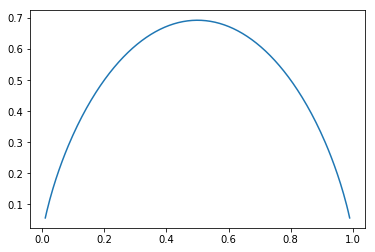

In [7]:
plt.plot(X,entry(X))

In [8]:
from collections import Counter
def split(x,y,d,value):
    index_a = (x[:,d] <=value)
    index_b = (x[:,d] >value)
    return x[index_a],x[index_b],y[index_a],y[index_b]
def entropy(y):
    counter = Counter(y)
    res =0
    for num in counter.values():
        p = num/len(y)
        res+= -p*np.log(p)
    return res

def try_split(x,y):
    best_entry = float('inf')
    best_d,best_v = -1,-1
    for d in range(x.shape[1]):
        sorted_index = np.argsort(x[:,d])
        for i in range(1,len(x)):
            v = (x[sorted_index[i-1],d]+x[sorted_index[i],d])/2
            x_l,x_r,y_1,y_r = split(x,y,d,v)
            e = entropy(y_1)+entropy(y_r )
            if e<best_entry:
                best_entry,best_d,best_v = e,d,v
    return best_entry,best_d,best_v

In [9]:
best_entry,best_d,best_v = try_split(x,y)
print('best_entry=' , best_entry)
print('best_d=' ,best_d)
print('best_v=' , best_v)

best_entry= 0.6931471805599453
best_d= 0
best_v= 1.9


In [10]:
 x_l,x_r,y_1,y_r = split(x,y,best_d,best_v)

In [11]:
print(entropy(y_1),entropy(y_r ))

0.0 0.6931471805599453


In [12]:
best_entry,best_d,best_v = try_split(x_r,y_r)
print('best_entry=' , best_entry)
print('best_d=' ,best_d)
print('best_v=' , best_v)

best_entry= 0.4132278899361904
best_d= 1
best_v= 1.7


In [13]:
 x2_l,x2_r,y2_1,y2_r = split(x_r,y_r,best_d,best_v)
print('best_entry=' , best_entry)
print('best_d=' ,best_d)
print('best_v=' , best_v)

best_entry= 0.4132278899361904
best_d= 1
best_v= 1.7


In [14]:
print(entropy(y2_1),entropy(y2_r ))

0.30849545083110386 0.10473243910508653


# 3. 基尼系数

### 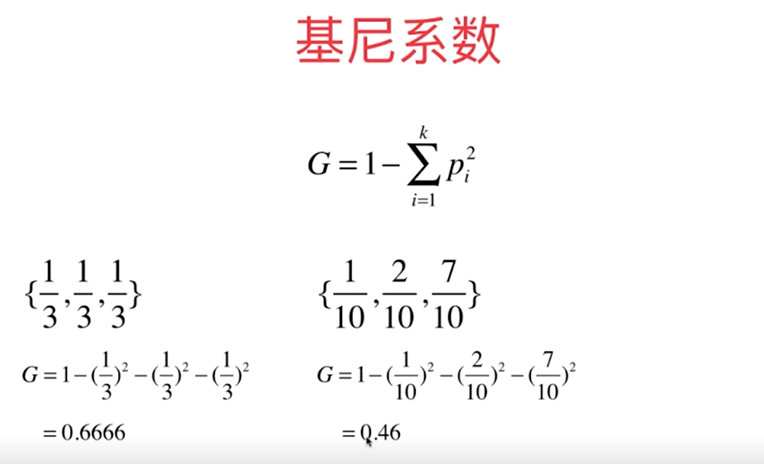

### 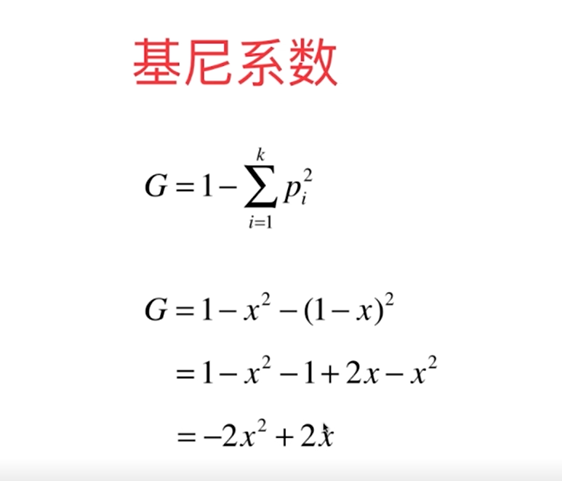

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 2,criterion='gini')
dt_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


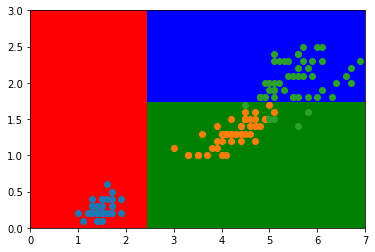

In [16]:
plot_decison_boundary(dt_clf,axis =[0,7,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])

In [17]:
from collections import Counter
def split(x,y,d,value):
    index_a = (x[:,d] <=value)
    index_b = (x[:,d] >value)
    return x[index_a],x[index_b],y[index_a],y[index_b]
def gini(y):
    counter = Counter(y)
    res =1
    for num in counter.values():
        p = num/len(y)
        res-= p**2
    return res

def try_split(x,y):
    best_g = float('inf')
    best_d,best_v = -1,-1
    for d in range(x.shape[1]):
        sorted_index = np.argsort(x[:,d])
        for i in range(1,len(x)):
            v = (x[sorted_index[i-1],d]+x[sorted_index[i],d])/2
            x_l,x_r,y_1,y_r = split(x,y,d,v)
            e = gini(y_1)+gini(y_r )
            if e<best_g:
                best_g,best_d,best_v = e,d,v
    return best_g,best_d,best_v

In [18]:
best_g,best_d,best_v = try_split(x,y)

In [19]:
print('best_g=' , best_g)
print('best_d=' ,best_d)
print('best_v=' , best_v)

best_g= 0.5
best_d= 0
best_v= 1.9


# 4. 12-5 CART与决策树中的超参数

In [20]:
from sklearn import datasets
x,y = datasets.make_moons(noise=0.25,random_state=666)

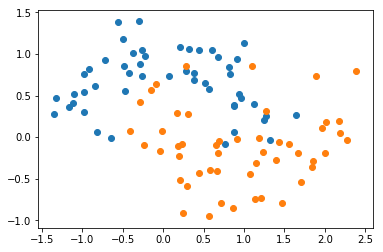

In [21]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x,y)

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


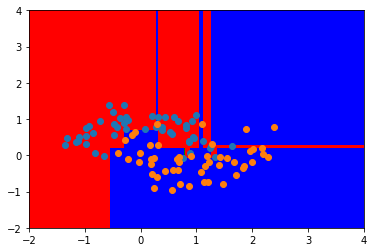

In [23]:
plot_decison_boundary(dt_clf,axis =[-2,4,-2,4])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])

In [24]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf = dt_clf.fit(x,y)

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


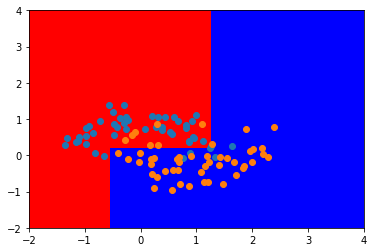

In [25]:
plot_decison_boundary(dt_clf,axis =[-2,4,-2,4])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


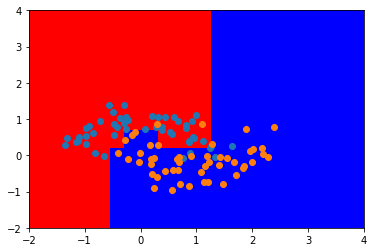

In [26]:
dt_clf = DecisionTreeClassifier(min_samples_split=10)
dt_clf = dt_clf.fit(x,y)
plot_decison_boundary(dt_clf,axis =[-2,4,-2,4])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


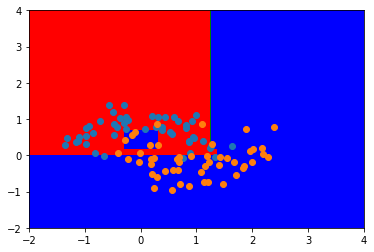

In [27]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=5)
dt_clf = dt_clf.fit(x,y)
plot_decison_boundary(dt_clf,axis =[-2,4,-2,4])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])

### 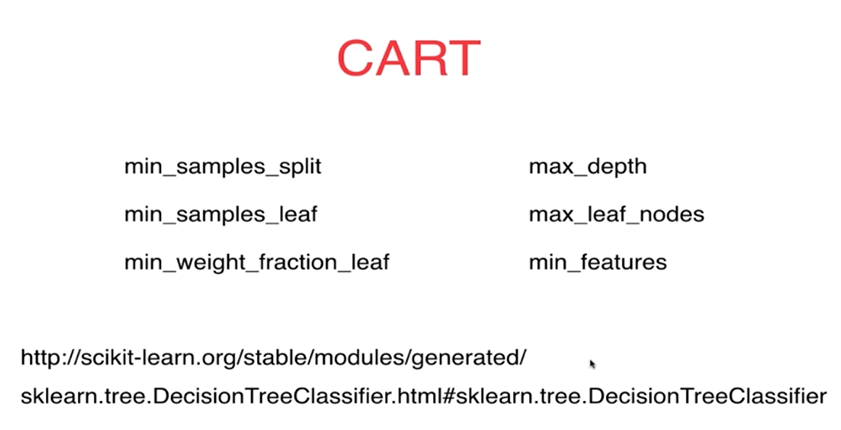

# 5.决策树解决回归的问题

In [28]:
from sklearn import datasets
boston = datasets.load_boston()
x = boston.data
y = boston.target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =666)

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
dt_reg.score(x_test,y_test)

0.5967803384042596

In [31]:
dt_reg.score(x_train,y_train)

1.0

### 明显是过拟合的

# 6 决策树的局限性

### 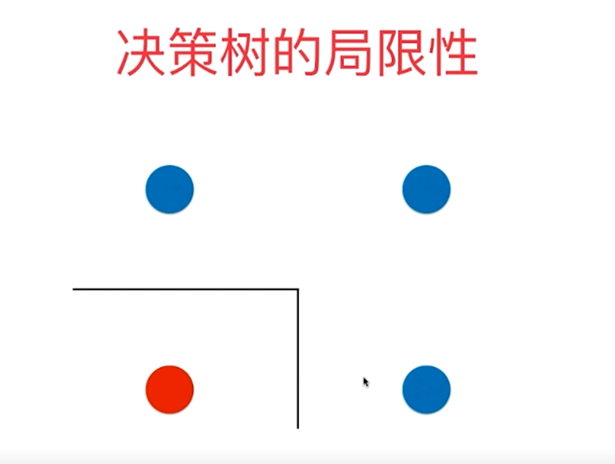

### 只能是平行于X轴和Y轴的线

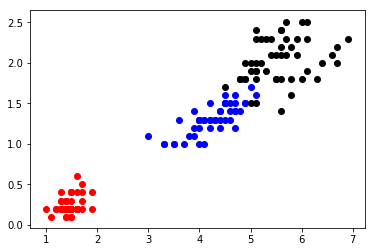

In [32]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x = x[:,2:]
plt.scatter(x[y==0,0],x[y==0,1],color = 'r')
plt.scatter(x[y==1,0],x[y==1,1],color = 'b')
plt.scatter(x[y==2,0],x[y==2,1],color = 'k')

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


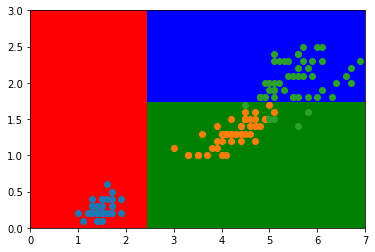

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 2,criterion='entropy')
dt_clf.fit(x,y)
plot_decison_boundary(dt_clf,axis =[0,7,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])

In [40]:
x_new = np.delete(x,139,axis=0)
y_new = np.delete(y,139)

d:\software\python36\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


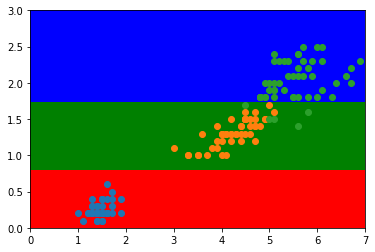

In [41]:
dt_clf = DecisionTreeClassifier(max_depth = 2,criterion='entropy')
dt_clf.fit(x_new,y_new)
plot_decison_boundary(dt_clf,axis =[0,7,0,3])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])